# Code to Reproduce Results for the B-cell Simulation Data

This code is used to reproduce the results for the B-cell simulation dataset.

## Requirements
- The code needs to be run on **Google Colab** with an **A100 GPU** for optimal performance.

## Additional Resources
- At the end of the `.ipynb` notebook, you will find:
  - **Links to Pretrained Models**
  - **Links to the Main Results**



In [24]:
!pip install umap-learn
!pip install scanpy
!pip install bbknn
!pip install palettable
!pip install hdf5plugin
!pip install harmonypy
!pip install gdown
!pip3 install igraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 57.3 MB/s eta 0:00:00


In [8]:
import warnings
import matplotlib
from matplotlib.colors import LinearSegmentedColormap
warnings.filterwarnings('ignore')

import gdown
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series,DataFrame
import seaborn as sns
import palettable
from sklearn import datasets
#import anndata as ad
import scanpy as sc
from anndata import AnnData
import anndata as ad
import pandas as pd
from scipy.sparse import issparse
import numpy as np
import pooch
from matplotlib.pyplot import rc_context
import os

import scanpy.external as sce
from matplotlib.pyplot import rc_context
import h5py
import hdf5plugin
import matplotlib as mpl
from matplotlib import rcParams

In [4]:
class ScPyPy:
    @staticmethod
    def adv_umap(adata, color=None, mask_obs=None, gene_symbols=None, use_raw=None, sort_order=True, edges=False,
        edges_width=0.1, edges_color='grey', neighbors_key=None, arrows=False, arrows_kwds=None, groups=None,
        components=None, dimensions=None, layer=None, projection='2d', scale_factor=None, color_map="plasma",
        cmap=None, palette='tab20b', na_color='lightgray', na_in_legend=True, size=None, frameon=False,
        legend_fontsize=None, legend_fontweight='bold', legend_loc='right margin', legend_fontoutline=None,
        colorbar_loc='right', vmax=None, vmin=None, vcenter=None, norm=None, add_outline=False,
        outline_width=(0.3, 0.05), outline_color=('black', 'white'), ncols=4, hspace=0.25, wspace=None, title=None,
        show=False, save=None, ax=None, return_fig=None, marker='.',min_ax_fontsize = 6,min_ax_lw = 2, **kwargs):
        """
        Visualize UMAP projections of the data with the option to save the output.

        Example:
        adv_umap(adata, color_feature, palette='tab20b', save=None, save_format='png')
        Parameters:
        adata (AnnData): Annotated data matrix.
        color_feature (str): Column name in adata.obs to use for coloring.
        palette (str, optional): Color palette name. Defaults to 'tab20b'.
        save (str, optional): If provided, save the figure to this file name within a 'figures' directory.
        save_format (str, optional): Format to save the figure in, e.g., 'png', 'pdf', etc. Defaults to 'png'.
        """
        fig, main_ax = plt.subplots()
        #sc.pl.umap(adata, color=[color_feature], frameon=False, ax=main_ax, show=False,color_map=color_map, palette=palette)
        sc.pl.umap(
        adata=adata,
        ax=main_ax,
        color=color,
        mask_obs=mask_obs,
        gene_symbols=gene_symbols,
        use_raw=use_raw,
        sort_order=sort_order,
        edges=edges,
        edges_width=edges_width,
        edges_color=edges_color,
        neighbors_key=neighbors_key,
        arrows=arrows,
        arrows_kwds=arrows_kwds,
        groups=groups,
        components=components,
        dimensions=dimensions,
        layer=layer,
        projection=projection,
        scale_factor=scale_factor,
        color_map=color_map,
        cmap=cmap,
        palette=palette,
        na_color=na_color,
        na_in_legend=na_in_legend,
        size=size,
        frameon=frameon,
        legend_fontsize=legend_fontsize,
        legend_fontweight=legend_fontweight,
        legend_loc=legend_loc,
        legend_fontoutline=legend_fontoutline,
        colorbar_loc=colorbar_loc,
        vmax=vmax,
        vmin=vmin,
        vcenter=vcenter,
        norm=norm,
        add_outline=add_outline,
        outline_width=outline_width,
        outline_color=outline_color,
        ncols=ncols,
        hspace=hspace,
        wspace=wspace,
        title=title,
        show=show,
        save=save,
        return_fig=return_fig,
        marker=marker,
        **kwargs  # 允许传递额外的参数
              )
        min_ax = fig.add_axes([0.0, 0.0, 0.6, 0.6])  # xmin, ymin, dx, dy
        min_ax.set_xlim(0, 2)
        min_ax.set_ylim(0, 2)
        min_ax.axis('off')
        min_ax.plot([0.5, 0.9], [0.5, 0.5], lw=min_ax_lw, color='k')
        min_ax.plot([0.5, 0.5], [0.5, 0.9], lw=min_ax_lw, color='k')
        min_ax.text(0.72, 0.38, 'UMAP1', horizontalalignment='center', verticalalignment='center', fontsize=min_ax_fontsize, fontweight='bold')
        min_ax.text(0.38, 0.72, 'UMAP2', horizontalalignment='center', verticalalignment='center', fontsize=min_ax_fontsize, rotation=90, fontweight='bold')

        if save:
            os.makedirs('figures', exist_ok=True)
            file_path = os.path.join('figures', f'{save}.{save_format}')
            plt.savefig(file_path, format=save_format, dpi=300)
            print(f"Saved figure as {file_path}")

        plt.show()
        plt.close(fig)

    @staticmethod
    def anno_agent(adata, cell_type, cluster_key="leiden_res_ori_0.50"):
        """
        Generate and return a summary of top marker genes for clusters defined in the data.

        Example:
        anno_agent(adata, cell_type = 'RCC', cluster_key="leiden_res_ori_0.50")
        Parameters:
        adata (AnnData): Annotated data matrix.
        cell_type (str): Description of the cell type to annotate.
        cluster_key (str, optional): Key in adata.obs used for clustering. Defaults to 'leiden_res_ori_0.50'.
        """
        clusters = sorted(adata.obs[cluster_key].unique(), key=lambda x: float(x) if str(x).isdigit() else x)
        output_template = "{}: {}"
        output_lines = []

        for cluster in clusters:
            df = sc.get.rank_genes_groups_df(adata, group=cluster).head(20)
            gene_names = df['names'].tolist()
            line = output_template.format(cluster, '、'.join(gene_names))
            output_lines.append(line)

        content = (
            f"Identify cell types of {cell_type} using the following markers. "
            "The output requirement is in the format (cluster: cell type)."
            "Identify one cell type for each row. Attention - Only provide the cell type name,"
            "no further explanation is required ： \n"
            + " \n".join(output_lines)
        )

        return content




In [5]:
os.environ['HDF5_PLUGIN_PATH'] = '/usr/local/hdf5/lib/plugin'

# read data

In [9]:
file_id = "1LxNBBavo-fcSJy7P7UsJuu-ZFZQFS39J"
output = "naiveB_1900_memoryB_154_raw.h5ad"
gdown.download(f"https://drive.google.com/uc?id={file_id}", output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1LxNBBavo-fcSJy7P7UsJuu-ZFZQFS39J
To: /content/naiveB_1900_memoryB_154_raw.h5ad
100%|██████████| 11.7M/11.7M [00:00<00:00, 18.4MB/s]


'naiveB_1900_memoryB_154_raw.h5ad'

In [10]:
b_plasma_adata = sc.read_h5ad(output)

In [11]:
b_plasma_adata

AnnData object with n_obs × n_vars = 2054 × 17009
    obs: 'barcodes', 'batch', 'perturbed'
    var: 'gene_ids'
    layers: 'counts'

In [12]:
b_plasma_adata.obs['binary_label'] = b_plasma_adata.obs['batch']=='Case'

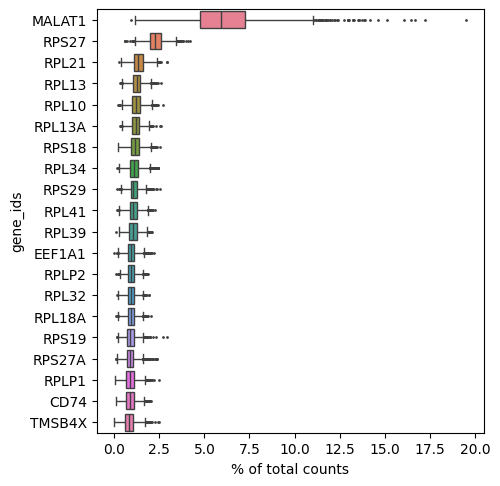

In [13]:
sc.pl.highest_expr_genes(b_plasma_adata, n_top=20)

In [14]:
sc.pp.filter_cells(b_plasma_adata, min_genes=200)
sc.pp.filter_genes(b_plasma_adata, min_cells=3)

In [15]:
adata = b_plasma_adata

In [16]:
# Saving count data
adata.layers["counts"] = adata.X.copy()

In [17]:
# Normalizing to median total counts
sc.pp.normalize_total(adata)
# Logarithmize the data
sc.pp.log1p(adata)

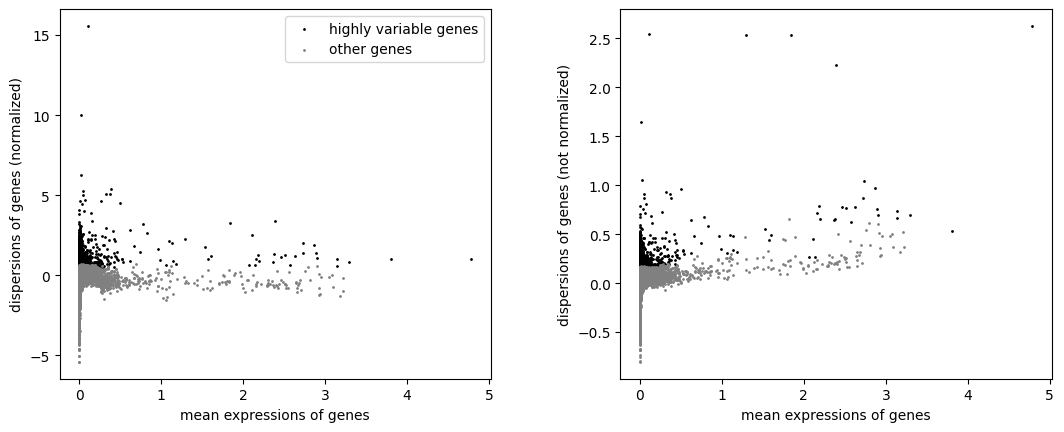

In [18]:
sc.pp.highly_variable_genes(adata, n_top_genes=2000, batch_key="batch")
sc.pl.highly_variable_genes(adata)

In [19]:
adata.raw = adata # adata = adata.raw.to_adata()

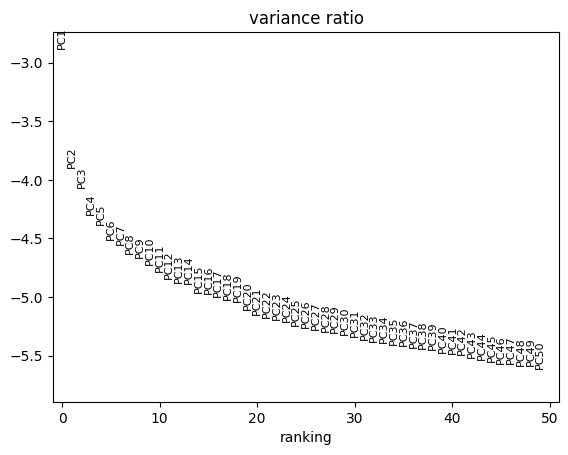

In [20]:
sc.tl.pca(adata)
sc.pl.pca_variance_ratio(adata, n_pcs=50, log=True)

sc.external.pp.bbknn(adata, batch_key="batch")
sc.pl.pca(adata, color="MZB1")
sc.pl.pca_variance_ratio(adata, log=True)
#sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)

In [ ]:
sc.external.pp.bbknn(adata, batch_key="batch")
sc.pl.pca(adata, color="MZB1")
sc.pl.pca_variance_ratio(adata, log=True)
#sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)

In [22]:
def integrate_and_cluster(adata, method='harmony',batch_key = 'sample'):
    if method.lower() == 'harmony':
        print(">> Using Harmony for batch integration...")
        sce.pp.harmony_integrate(adata, batch_key)
        sc.pp.neighbors(adata, n_pcs=40, use_rep='X_pca_harmony')
    elif method.lower() == 'bbknn':
        print(">> Using BBKNN for batch integration...")
        import bbknn
        sc.external.pp.bbknn(
            adata,
            batch_key=batch_key)
    else:
        print(">> No batch integration (using standard neighbors)...")
        sc.pp.neighbors(adata, n_pcs=30, use_rep='X_pca')
    sc.tl.umap(adata)
    return adata

# method = "harmony"
# method = "bbknn"
# method = "none"
method = "bbknn"
adata = integrate_and_cluster(adata, method=method,batch_key = 'batch')

>> Using BBKNN for batch integration...


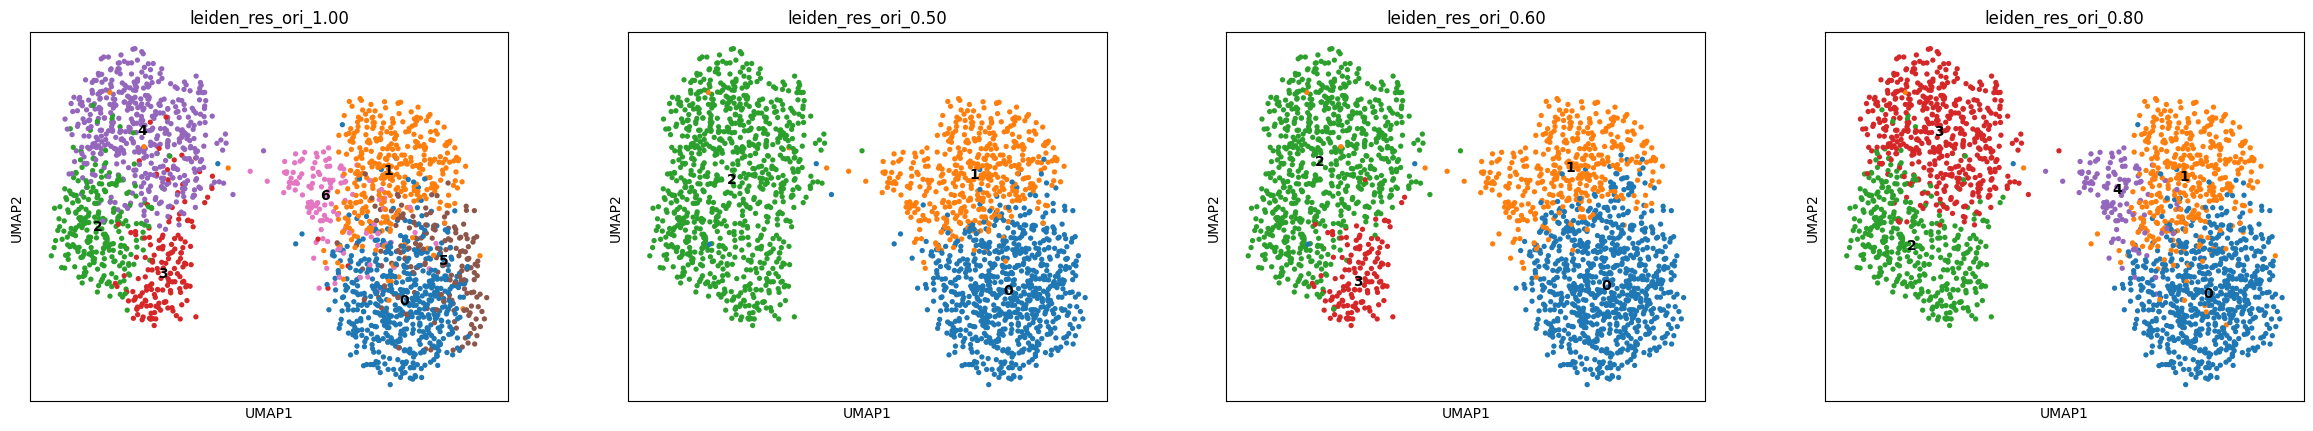

In [25]:
for res in [1.0, 0.5, 0.6, 0.8]:
    sc.tl.leiden(
        adata, key_added=f"leiden_res_ori_{res:4.2f}", resolution=res, flavor="igraph"
    )
sc.pl.umap(
    adata,
    color=["leiden_res_ori_1.00", "leiden_res_ori_0.50", "leiden_res_ori_0.60", "leiden_res_ori_0.80"],
    legend_loc="on data",
)

# Separate the data into subsets based on the condition

In [26]:
path = "/content/Deep-scSTAR/inputs"
adata_Case = adata[adata.obs['batch'] == 'Case', :].copy()
adata_Control = adata[adata.obs['batch'] == 'Control', :].copy()

In [28]:
os.chdir('/content/')

In [29]:
!git clone https://github.com/Hao-Zou-lab/Deep-scSTAR.git

Cloning into 'Deep-scSTAR'...
remote: Enumerating objects: 203, done.
remote: Counting objects: 100% (115/115), done.
remote: Compressing objects: 100% (101/101), done.
remote: Total 203 (delta 46), reused 59 (delta 14), pack-reused 88 (from 1)
Receiving objects: 100% (203/203), 10.33 MiB | 6.38 MiB/s, done.
Resolving deltas: 100% (87/87), done.


In [30]:
adataCase = AnnData(X=adata_Case.X,
                    obs=pd.DataFrame(index=adata_Case.obs_names),
                    var=pd.DataFrame(index=adata_Case.var_names))



save_path = os.path.join(path, 'case.h5ad')
adataCase.write(save_path)


adataControl = AnnData(X=adata_Control.X,
                    obs=pd.DataFrame(index=adata_Control.obs_names),
                    var=pd.DataFrame(index=adata_Control.var_names))



save_path = os.path.join(path, 'ctr.h5ad')
adataControl.write(save_path)


# DscSTAR

In [32]:
os.chdir('/content/Deep-scSTAR/')

# Parameter Settings

To modify the parameters, open the following file:  
`/content/Deep-scSTAR/run_DscSTAR.py`

## Hyperparameters

- **Data Preprocessing Method:** `mc`
- **Autoencoder Type:** `512`
- **Batch Size:** `100` (Batch size for each cluster)
- **Number of Epochs:** `500`
- **Base Learning Rate:** `1e-3`
- **Learning Rate Step Decay:** `40` (Step decay for learning rates)
- **Momentum:** `0.9`
- **L2 Decay:** `2e-5`
- **Gamma:** `10.0` (Regularization factor between reconstruction and transfer learning, typically in the range of `10-50`)
- **Log Interval:** `40`


In [34]:
!python run_DscSTAR.py --f "h5ad" --s "h5ad"\
--data-folder "inputs/" \
--input-1 "case.h5ad" \
--input-2 "ctr.h5ad" \
--output-1 "case.out.h5ad" \
--output-2 "ctr.out.h5ad" \
--output-folder "outputs/"

2025-02-01 14:30:00.818595: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738420200.840450    6877 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738420200.847179    6877 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
(12424, 1027)
(12424, 1027)
read done
[0.0335247  0.00945561 0.00807639 ... 0.00256471 0.00097906 0.00296995]
preprocess done
The shape of the gene_exp is: (12424, 2054)
[0.0335247  0.00945561 0.00807639 ... 0.00256471 0.00097906 0.00296995]
batch_labels: [1 1 1 ... 2 2 2]
Using GPU acceleration.
Sat Feb  1 14:30:21 2025, Epoch 40, learning rate 5.000E-04, gamma 9.680E+00
Avg_loss 0.152021372318	 Avg_reconstruct_loss 0.132868054695	 

In [35]:
adataCase_out=sc.read_h5ad('/content/Deep-scSTAR/outputs/case.out.h5ad')

In [36]:
adataCase_out = adataCase_out.T

In [37]:
X_processed = adataCase_out.X

adataCase_out.obs = adata_Case.obs.copy()
adataCase_out.var = adata_Case.var.copy()

adataCase_out.uns = adata_Case.uns.copy()
adataCase_out.obsp = adata_Case.obsp.copy()
adataCase_out.varp = adata_Case.varp.copy()

adataCase_out.X = X_processed

In [38]:
adataControl_out=sc.read_h5ad('/content/Deep-scSTAR/outputs/ctr.out.h5ad')

In [39]:
adataControl_out = adataControl_out.T
X_processed = adataControl_out.X

adataControl_out.obs = adata_Control.obs.copy()
adataControl_out.var = adata_Control.var.copy()

adataControl_out.uns = adata_Control.uns.copy()
adataControl_out.obsp = adata_Control.obsp.copy()
adataControl_out.varp = adata_Control.varp.copy()

adataControl_out.X = X_processed

In [40]:
adata_merged = ad.concat([adataCase_out, adataControl_out], axis=0)

In [41]:
sc.pp.highly_variable_genes(adata_merged, n_top_genes=2000, batch_key="batch")

In [42]:
adata_merged.raw = adata_merged # adata = adata.raw.to_adata()

In [43]:
sc.tl.pca(adata_merged)

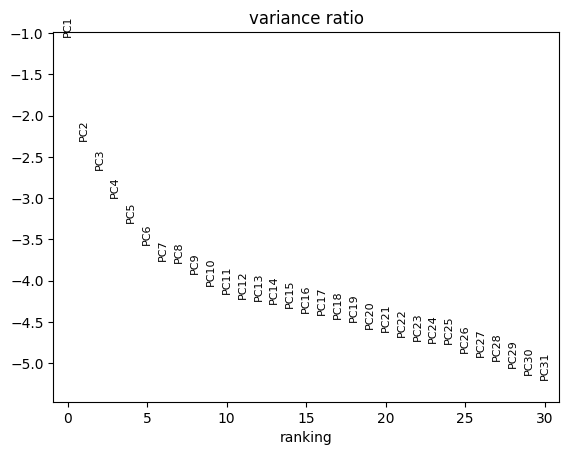

In [44]:
sc.pl.pca_variance_ratio(adata_merged, log=True)
sc.pp.neighbors(adata_merged, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata_merged)

In [45]:
for res in [0.02, 0.5, 0.6]:
    sc.tl.leiden(
        adata_merged, key_added=f"leiden_res_ori_{res:4.2f}", resolution=res, flavor="igraph"
    )


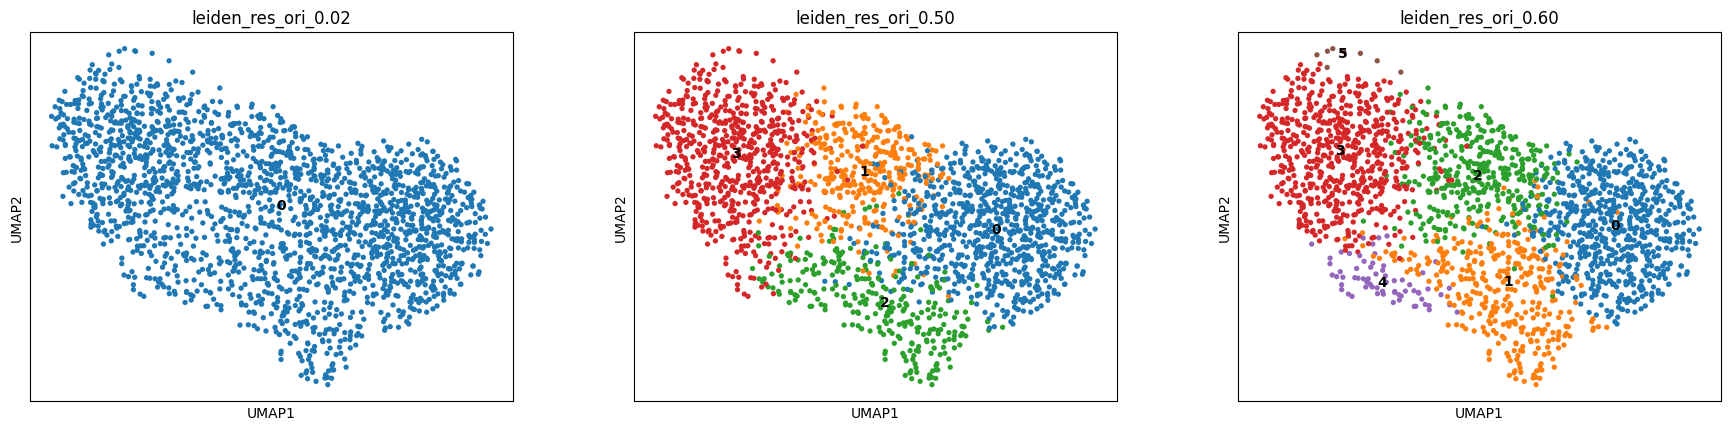

In [46]:
sc.pl.umap(
    adata_merged,
    color=["leiden_res_ori_0.02", "leiden_res_ori_0.50", "leiden_res_ori_0.60"],
    legend_loc="on data",
)

In [47]:
adata_merged = adata_merged.raw.to_adata()

In [48]:

adata_merged.obs["Dsc"] = adata_merged.obs["leiden_res_ori_0.60"].map(
    {
        "0": "Dsc_C0",
        "1": "Dsc_C1",
        "2": "Dsc_C2",
        "3": "Dsc_C3",
        "4": "Dsc_C4",
        "5": "Dsc_C3"
    }
)

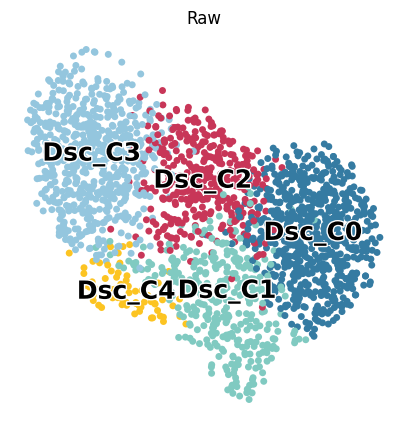

In [49]:
#Fig3a
custom_palette = ['#357ba2', '#80cac1', '#c83658','#94c6de', '#fcc422']
adata_merged.obs['Dsc'] = pd.Categorical(adata_merged.obs['Dsc'], ordered=True)
with rc_context({"figure.figsize": (5, 5)}):
    sc.pl.umap(
        adata_merged,
        color="Dsc",
        legend_fontsize=18,
        legend_fontoutline=2,
        frameon=False,
        title="Raw",
        palette=custom_palette,
        wspace=0.5,
        add_outline=False,
        size=100,
        legend_loc="on data",
        save="_Dsc_Dsc_cluster.pdf",
        alpha = 1
    )


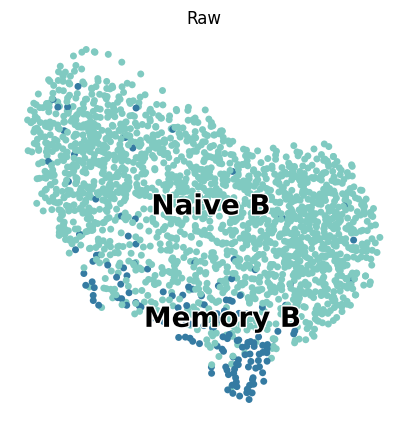

In [50]:
#Fig3a
custom_palette = ['#357ba2', '#80cac1', '#c83658','#94c6de', '#fcc422']
adata_merged.obs['perturbed'] = pd.Categorical(adata_merged.obs['perturbed'], ordered=True)
with rc_context({"figure.figsize": (5, 5)}):
    sc.pl.umap(
        adata_merged,
        color="perturbed",
        legend_fontsize=20,
        legend_fontoutline=2,
        frameon=False,
        title="Raw",
        palette=custom_palette,
        wspace=0.5,
        add_outline=False,
        size=100,
        legend_loc="on data",
        save="_perturbed_Dsc_cluster.pdf",
        alpha = 1
    )


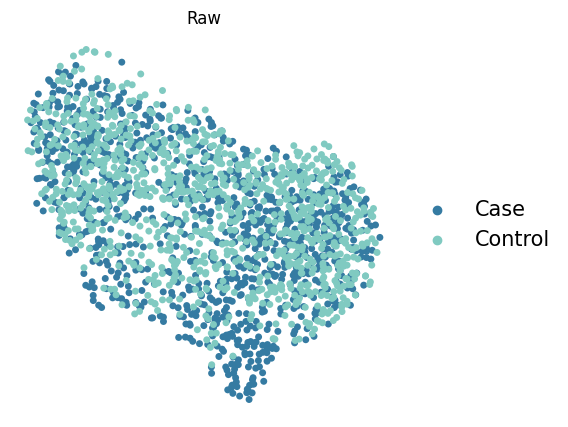

In [51]:
#Fig3a
custom_palette = ['#357ba2', '#80cac1', '#c83658','#94c6de', '#fcc422']
adata_merged.obs['batch'] = pd.Categorical(adata_merged.obs['batch'], ordered=True)
with rc_context({"figure.figsize": (5, 5)}):
    sc.pl.umap(
        adata_merged,
        color="batch",
        legend_fontsize=15,
        legend_fontoutline=2,
        frameon=False,
        title="Raw",
        palette=custom_palette,
        wspace=0.5,
        add_outline=False,
        size=100,
        #legend_loc="right",
        save="_batch_Dsc_cluster.pdf",
        alpha = 1
    )


#

In [60]:
sample_names = adata_merged.obs.index
leiden_categories = adata_merged.obs['Dsc']

In [59]:
leiden_categories = adata_merged.obs['Dsc']

leiden_df = pd.DataFrame({
    'Dsc': leiden_categories
}, index=sample_names)

adata.obs['Dsc'] = leiden_df.loc[adata.obs.index, 'Dsc']

print(adata.obs.head())

                      barcodes    batch perturbed  binary_label  n_genes  \
0  naiveB_a_AAACCTGCACGGTAGA-1     Case   Naive B          True      783   
1  naiveB_a_AAACCTGCAGATGGGT-1     Case   Naive B          True      482   
2  naiveB_a_AAAGATGCATTTCAGG-1  Control   Naive B         False      424   
3  naiveB_a_AAAGCAAAGCCAACAG-1  Control   Naive B         False      603   
4  naiveB_a_AAAGCAAAGTGCCATT-1     Case   Naive B          True      465   

  leiden_res_ori_1.00 leiden_res_ori_0.50 leiden_res_ori_0.60  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   2                   2                   2   
3                   3                   2                   2   
4                   4                   2                   2   

  leiden_res_ori_0.80 Dsc_cluster     Dsc  
0                   0      Dsc_C0  Dsc_C0  
1                   0      Dsc_C0  Dsc_C0  
2                   

In [61]:
folder_name = 'DsTOoRI'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

downstream_path = os.path.abspath(folder_name)
sc.settings.figdir = downstream_path

# Dsc to ori

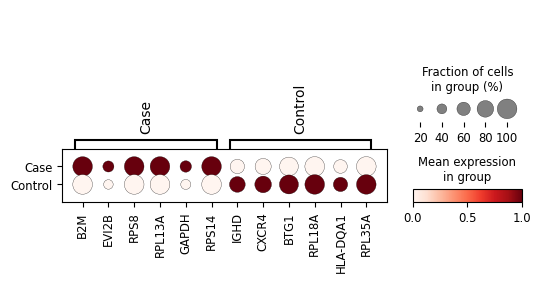

In [62]:
# Obtain cluster-specific differentially expressed genes
sc.tl.rank_genes_groups(adata, groupby="batch", method="wilcoxon")
sc.pl.rank_genes_groups_dotplot(
    adata, groupby="batch", standard_scale="var", n_genes=6
)

In [63]:
def extract_de_genes(adata, cluster_key="batch", top_n_genes=6):
    """
    Extract and return a dictionary of top differentially expressed genes for each cluster.

    Parameters:
    adata (AnnData): Annotated data matrix.
    cluster_key (str, optional): Key in adata.obs used for clustering. Defaults to 'batch'.
    top_n_genes (int, optional): Number of top genes to extract for each cluster. Defaults to 6.

    Returns:
    dict: A dictionary where each cluster maps to a list of its top DEGs.
    """
    clusters = sorted(adata.obs[cluster_key].unique())
    marker_genes_dict = {}

    for cluster in clusters:
        # Get the top n genes for each cluster
        df = sc.get.rank_genes_groups_df(adata, group=cluster).head(top_n_genes)
        gene_names = df['names'].tolist()
        marker_genes_dict[cluster] = gene_names

    return marker_genes_dict

# Example usage
marker_genes_dict = extract_de_genes(adata, cluster_key="batch", top_n_genes=8)

categories: Dsc_C0, Dsc_C1, Dsc_C2, etc.
var_group_labels: Case, Control


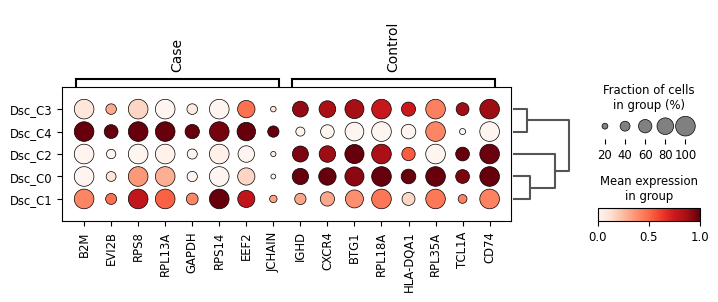

In [64]:
colors = ["#020835", "#3a4891", "#78a1df", '#f9fcf7',  "#af6c81", '#964e5a', "#572936"] #
custom_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("custom_cmap", colors)
sc.pl.dotplot(adata, marker_genes_dict, "Dsc", dendrogram=True, standard_scale = "var" ,edgecolor='black',
    linewidth=0.5 )

In [66]:
marker_genes_bcell = {
    "Naive B": [
        "FCER2",
        "TCL1A",
        "IL4R"
    ],
    "Memory B":["CD27","ITGB1", "AIM2", "TNFRSF13B"],
    "Plasmablast up":["PRDM1"],
    "Plasmablast down":["PAX5"]
}

categories: Dsc_C0, Dsc_C1, Dsc_C2, etc.
var_group_labels: Naive B, Memory B, Plasmablast up, etc.


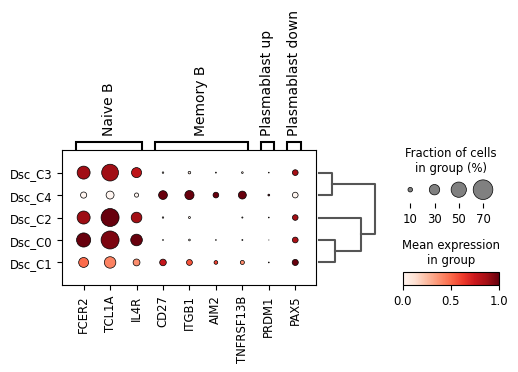

In [67]:
sc.pl.dotplot(adata, marker_genes_bcell, "Dsc", dendrogram=True, standard_scale = "var" ,edgecolor='black',  # 点的边框颜色
    linewidth=0.5 )

categories: 0, 1, 2, etc.
var_group_labels: Naive B, Memory B, Plasmablast up, etc.


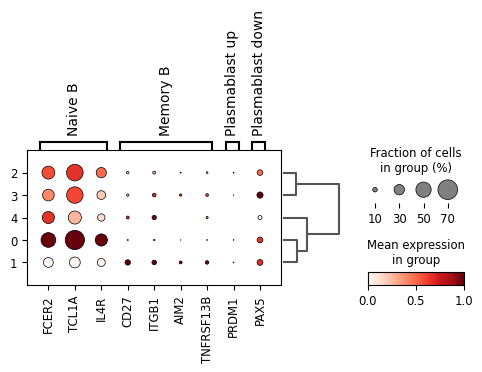

In [68]:
sc.pl.dotplot(adata, marker_genes_bcell, "leiden_res_ori_0.80", dendrogram=True, standard_scale = "var" ,edgecolor='black',  # 点的边框颜色
    linewidth=0.5 )

In [70]:
#bbknn
adata.obs["Ori"] = adata.obs["leiden_res_ori_0.80"].map(
    {
        "0": "Ori_C0",
        "1": "Ori_C1",
        "2": "Ori_C2",
        "3": "Ori_C3",
        "4": "Ori_C4"
    }
)

categories: Ori_C0, Ori_C1, Ori_C2, etc.
var_group_labels: Naive B, Memory B, Plasmablast up, etc.


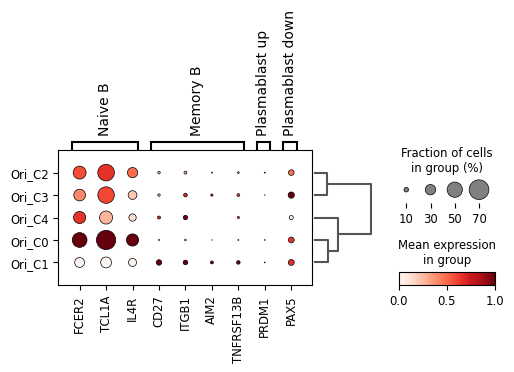

In [71]:
sc.tl.dendrogram(adata, groupby='Ori')
sc.pl.dotplot(adata, marker_genes_bcell, "Ori", dendrogram=True, standard_scale = "var" ,edgecolor='black',  # 点的边框颜色
    linewidth=0.5 )

categories: Ori_C0, Ori_C1, Ori_C2, etc.
var_group_labels: Case, Control


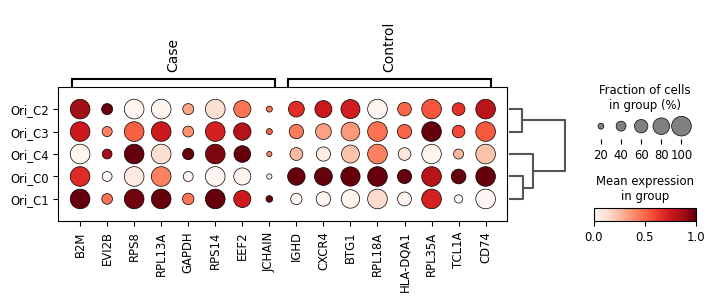

In [72]:
sc.pl.dotplot(adata, marker_genes_dict, "Ori", dendrogram=True, standard_scale = "var" ,edgecolor='black',  # 点的边框颜色
    linewidth=0.5 )

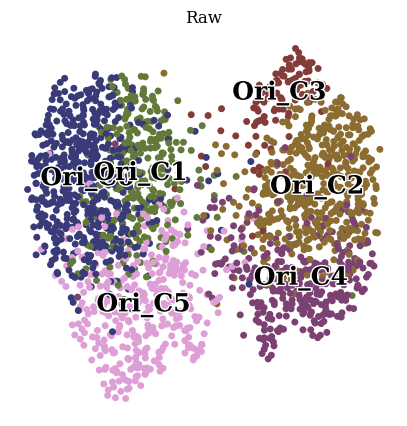

In [ ]:
#Fig3a
custom_palette = ['#357ba2', '#80cac1', '#c83658','#94c6de', '#fcc422']
adata.obs['Ori'] = pd.Categorical(adata.obs['Ori'], ordered=True)
with rc_context({"figure.figsize": (5, 5)}):
    sc.pl.umap(
        adata,
        color="Ori",
        legend_fontsize=18,
        legend_fontoutline=2,
        frameon=False,
        title="Raw",
        palette="tab20b",
        wspace=0.5,
        add_outline=False,
        size=100,
        legend_loc="on data",
        save="_Ori_cluster.pdf",
        alpha = 1
    )


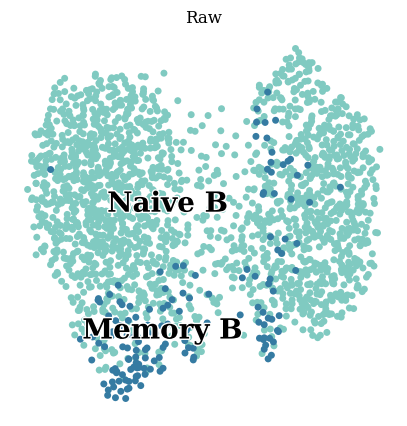

In [ ]:
#Fig3a
custom_palette = ['#357ba2', '#80cac1', '#c83658','#94c6de', '#fcc422']
adata.obs['perturbed'] = pd.Categorical(adata.obs['perturbed'], ordered=True)
with rc_context({"figure.figsize": (5, 5)}):
    sc.pl.umap(
        adata,
        color="perturbed",
        legend_fontsize=20,
        legend_fontoutline=2,
        frameon=False,
        title="Raw",
        palette=custom_palette,
        wspace=0.5,
        add_outline=False,
        size=100,
        legend_loc="on data",
        save="_Oriperturbed_Dsc_cluster.pdf",
        alpha = 1
    )


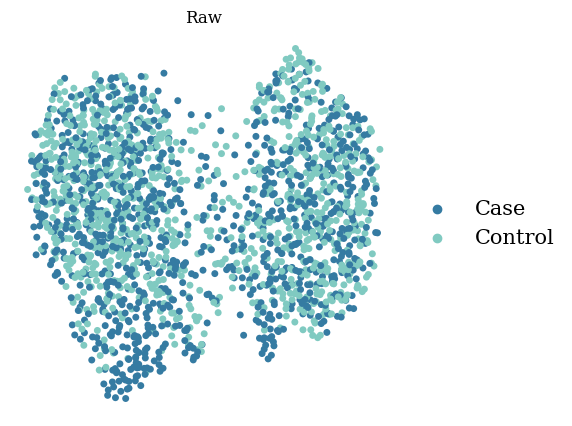

In [ ]:
#Fig3a
custom_palette = ['#357ba2', '#80cac1', '#c83658','#94c6de', '#fcc422']
adata.obs['batch'] = pd.Categorical(adata.obs['batch'], ordered=True)
with rc_context({"figure.figsize": (5, 5)}):
    sc.pl.umap(
        adata,
        color="batch",
        legend_fontsize=15,
        legend_fontoutline=2,
        frameon=False,
        title="Raw",
        palette=custom_palette,
        wspace=0.5,
        add_outline=False,
        size=100,
        #legend_loc="right",
        save="_Oribatch_Dsc_cluster.pdf",
        alpha = 1
    )


#scTour

In [75]:
adata = sc.read_h5ad("/content/naiveB_1900_memoryB_154_raw.h5ad")

In [77]:
!pip install scikit-misc
!pip install sctour

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.0/189.0 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 65.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 103.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 86.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 90.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-c

In [78]:
adata = adata[adata.obs['batch'] == 'Case', :].copy()

In [79]:
import sctour as sct
sc.pp.filter_genes(adata, min_counts=3)
adata

AnnData object with n_obs × n_vars = 1027 × 11187
    obs: 'barcodes', 'batch', 'perturbed'
    var: 'gene_ids', 'n_counts'
    layers: 'counts'

In [80]:
sc.pp.calculate_qc_metrics(adata, percent_top=None, log1p=False, inplace=True)
sc.pp.highly_variable_genes(adata, flavor='seurat_v3', n_top_genes=2000, subset=True)
adata

AnnData object with n_obs × n_vars = 1027 × 2000
    obs: 'barcodes', 'batch', 'perturbed', 'n_genes_by_counts', 'total_counts'
    var: 'gene_ids', 'n_counts', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'hvg'
    layers: 'counts'

In [81]:
adata.X = adata.X.astype('float32')

In [82]:
# Initialize the Trainer with specific parameters
tnode = sct.train.Trainer(adata, loss_mode='nb', alpha_recon_lec=0.5, alpha_recon_lode=0.5)
# Train the model
tnode.train()

Epoch 400: 100%|██████████| 400/400 [02:23<00:00,  2.78epoch/s, train_loss=374, val_loss=403]


In [83]:
adata.obs['ptime'] = tnode.get_time()
adata.obs['ptime'] = sct.train.reverse_time(adata.obs['ptime'].values)
mix_zs, zs, pred_zs = tnode.get_latentsp(alpha_z=0.5, alpha_predz=0.5)
adata.obsm['X_TNODE'] = mix_zs
adata.obsm['X_VF'] = tnode.get_vector_field(adata.obs['ptime'].values, adata.obsm['X_TNODE'])
adata = adata[np.argsort(adata.obs['ptime'].values), :]

In [84]:

sc.pp.neighbors(adata, use_rep='X_TNODE', n_neighbors=15)
sc.tl.umap(adata, min_dist=0.1)

In [86]:
leiden_categories = adata_merged.obs['Dsc']

leiden_df = pd.DataFrame({
    'Dsc': leiden_categories
}, index=sample_names)

adata.obs['Dsc'] = leiden_df.loc[adata.obs.index, 'Dsc']

print(adata.obs.head())

                         barcodes batch perturbed  n_genes_by_counts  \
1392  naiveB_b_GAAATGACACCTCGTT-1  Case   Naive B               1082   
751   naiveB_a_TGGGCGTCACAACTGT-1  Case   Naive B                523   
950   naiveB_b_AGACGTTCATCGATGT-1  Case   Naive B                501   
625   naiveB_a_GTGTTAGTCATGCTCC-1  Case   Naive B                540   
1228  naiveB_b_CGAGAAGTCCATGCTC-1  Case   Naive B                410   

      total_counts     ptime     Dsc  
1392          3985  0.230208  Dsc_C3  
751           1468  0.344709  Dsc_C0  
950           1574  0.347631  Dsc_C0  
625           1468  0.364169  Dsc_C0  
1228          1175  0.364601  Dsc_C3  


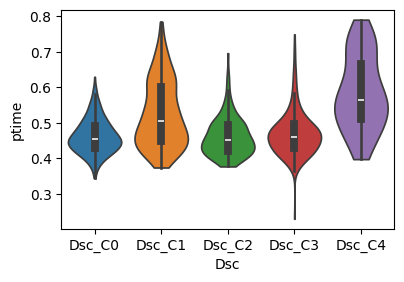

In [87]:
with rc_context({"figure.figsize": (4.5, 3)}):
    sc.pl.violin(
        adata,
        ["ptime"],
        groupby="Dsc",
        stripplot=False,  # remove the internal dots
        inner="box",  # adds a boxplot inside violins
    )

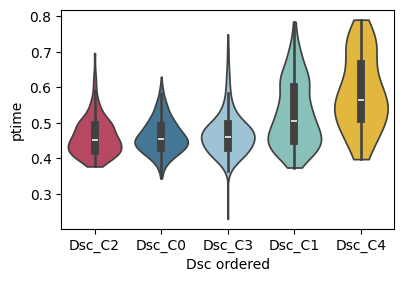

In [89]:
import scanpy as sc
import pandas as pd
from matplotlib import rc_context

group_means = adata.obs.groupby('Dsc')['ptime'].mean().sort_values(ascending=False)
ordered_groups = group_means.index.tolist()
ordered_groups = ['Dsc_C2', 'Dsc_C0', 'Dsc_C3', 'Dsc_C1', 'Dsc_C4']
adata.obs['Dsc_ordered'] = pd.Categorical(
    adata.obs['Dsc'],
    categories=ordered_groups,
    ordered=True
)

custom_palette = ['#c83658','#357ba2',  '#94c6de','#80cac1',  '#fcc422']
palette_dict = {group: color for group, color in zip(ordered_groups, custom_palette)}

with rc_context({"figure.figsize": (4.5, 3)}):
    sc.pl.violin(
        adata,
        ['ptime'],
        groupby='Dsc_ordered',
        stripplot=False,
        inner='box',
        palette=palette_dict
    )

# **Links to Pretrained Models and Main Results**

https://drive.google.com/file/d/14-vJebFK5KyhMTGhRfoKd22kol6SB5Qx/view?usp=drive_link